<div>
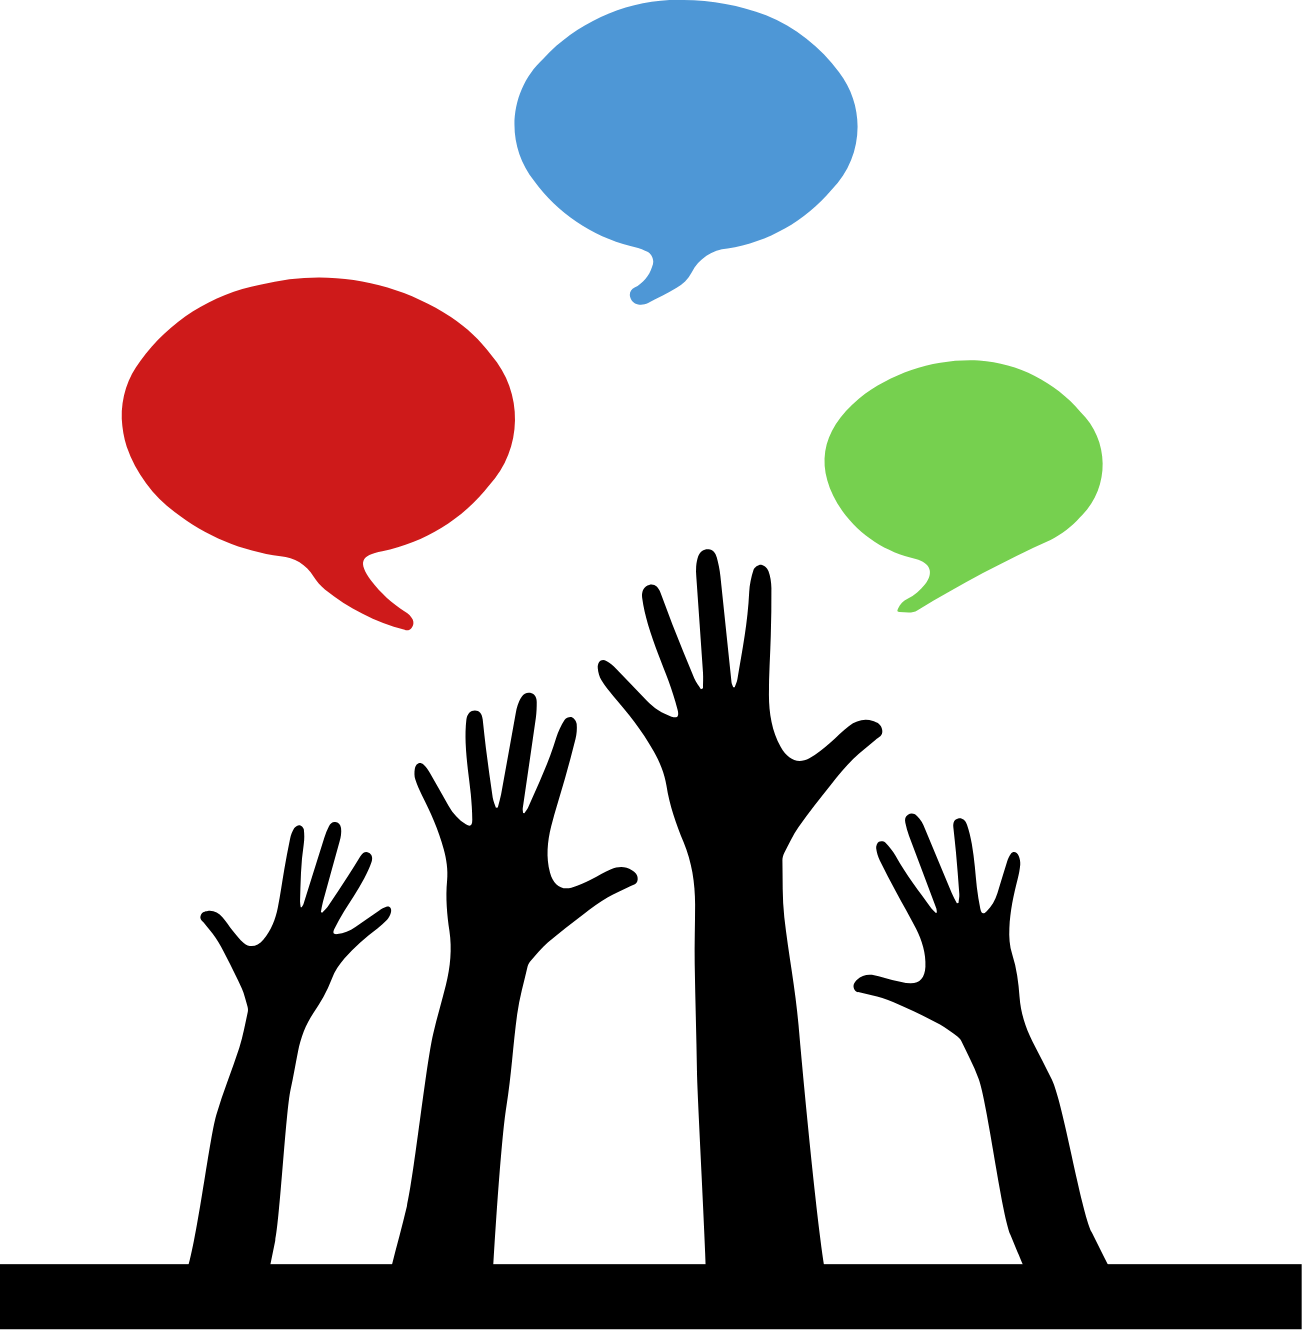
</div>

# <center>The Sparks Foundation
## <center>Data Science & Business Analytics Internship

<br>
<br>
<br>

## Task-5: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
___
## Problem Statement:

### -As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team
### -Suggest teams or players a company should endorse for its products
___
## Dataset: https://bit.ly/34SRn3b
___
## Submitted by Shubham Gupta

<br>

<br>

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

## Importing 1st Dataset 

In [2]:
match = pd.read_csv('matches.csv')

## Data Audit

In [3]:
#First three rows of the dataset
match.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
# A concise summary of the dataset
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# Generating descriptive statistics summary
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Data Preprocessing

In [6]:
match.id.is_unique

True

In [7]:
#Since id is unique, we can have it as the index.
match.set_index('id', inplace=True)

In [8]:
match.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2009-05-07,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,Nitin Menon
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


#### Observation :
* City has 33 distinct values while venue has 35 distinct values.

* Umpire 1 and Umpire 2 have missing 1 value each while umpire 3 has about 94 % of the values missing.

* Team1 and Team 2 have 14 distinct values.

* Winner has 15 distinct values.

* Also city has missing values.

## Filling the Missing Values

In [9]:
# Let's find the venues for which the value of city is empty
match[match.city.isnull()][['city' , 'venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [10]:
#So, we can replace the missing values with 'Dubai'
match.city = match.city.fillna('Dubai')

In [11]:
#Umpire 1 and umpire2 have 1 missing value each
match[(match.umpire1.isnull())| (match.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [12]:
#Umpire3 has near about 93 % of the missing values. So, we can drop it
match = match.drop('umpire3', axis = 1)

## Importing 2nd Dataset

In [13]:
delivery = pd.read_csv('deliveries.csv')

## Data Audit

In [14]:
#First three rows of the dataset
delivery.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [15]:
# A concise summary of the dataset
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [16]:
# Generating descriptive statistics summary
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Merging 1st & 2nd Datasets

In [17]:
merge = pd.merge(delivery,match, left_on='match_id', right_on ='id')

## Data Audit

In [18]:
#First three rows of the dataset
merge[:3]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [19]:
# Generating descriptive statistics summary
merge.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,2019.000000,1.000000,146.000000,10.000000


In [20]:
# A concise summary of the dataset
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int



## Exploratory Data Analysis



## Teams Participated in each Season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

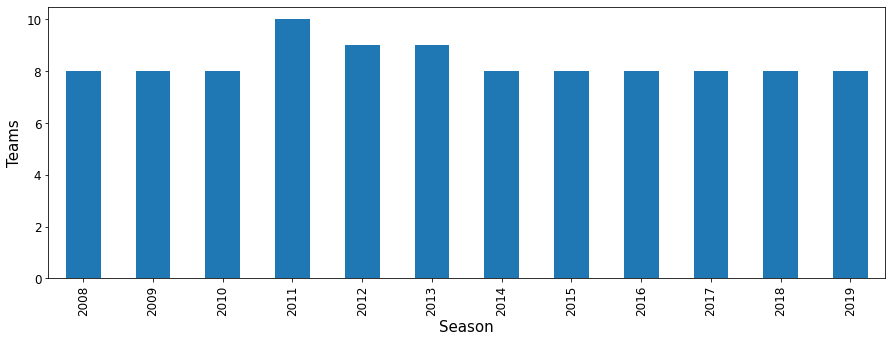

In [21]:
match.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.ylabel("Teams", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)


### Observation:
* 10 teams participated in the year 2011 & the maximum no. of matches played in season 2011 to 2013

## Matches Played in each Season

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

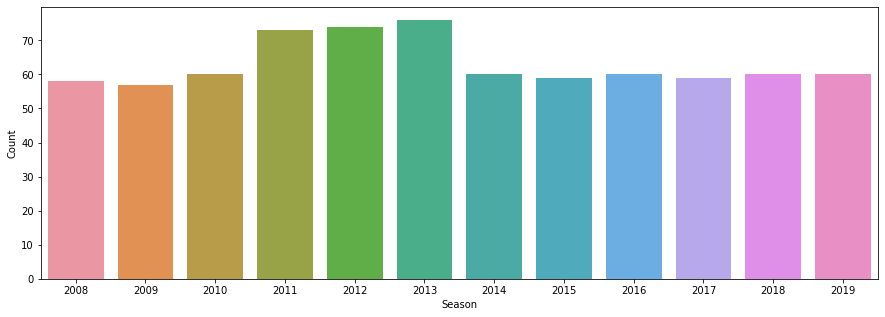

In [22]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = match)
plt.ylabel("Count", size = 10)
plt.xlabel("Season", size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

### Observation:
* Maximum number of matches played in season 2011 to 2013

## Players having most 'Man Of the Match Awards'

Text(0.5, 0, 'Players')

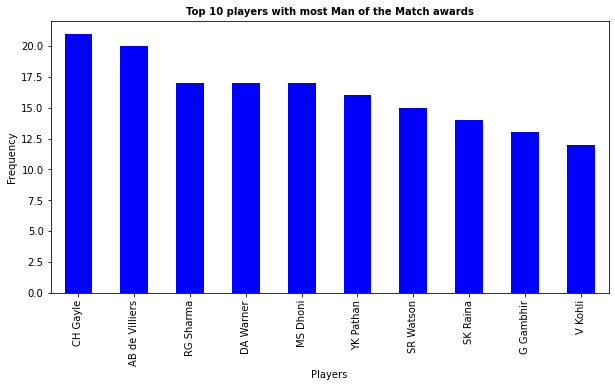

In [23]:
ManofMatch= match['player_of_match'].value_counts()
ManofMatch.head(10).plot(kind = 'bar',figsize=(10,5), fontsize=10, color='blue')
plt.title("Top 10 players with most Man of the Match awards",fontsize=10,fontweight="bold")
plt.ylabel("Frequency", size = 10)
plt.xlabel("Players", size = 10)

### Observation:
* CH Gayle , AB de Villiers are amongst the top players securing the most 'Man Of the Match Awards'

# Teams Won No. of Times in IPL

In [24]:
winningteams = match[['season','winner']]  ## A dataframe with seasons and winner

In [25]:
win_team = {}                              ## Created a dictionary to get winners of every season
for i in sorted(winningteams.season.unique()):
    win_team[i] = winningteams[winningteams.season == i]['winner'].tail(1).values[0]
    
winner_of_IPL = pd.Series(win_team)
winner_of_IPL = pd.DataFrame(winner_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Rajasthan Royals'),
  Text(0, 4, 'Deccan Chargers'),
  Text(0, 5, 'Sunrisers Hyderabad')])

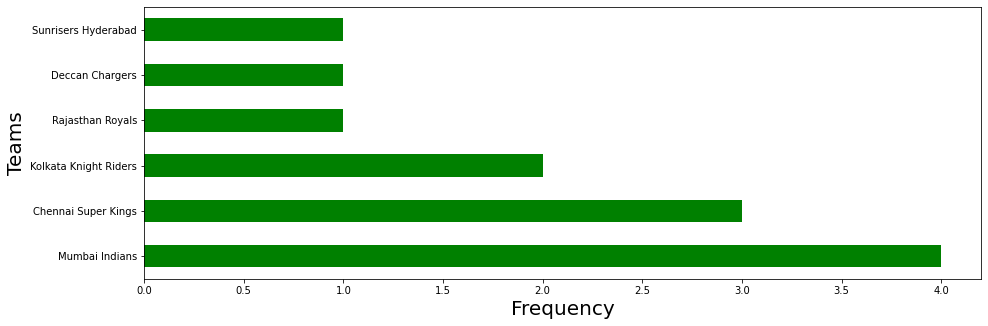

In [26]:
winner_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'green')
plt.ylabel("Teams", size = 20)
plt.xlabel("Frequency", size = 20)
plt.xticks(size = 10)
plt.yticks(size = 10)

### Observation: 
* The top three teams who won the maximum no. of times in IPL include Mumbai Indians, Chennai Super Kings and KKR

## Most decisions taken after a toss win

Text(0, 0.5, 'Toss Decision')

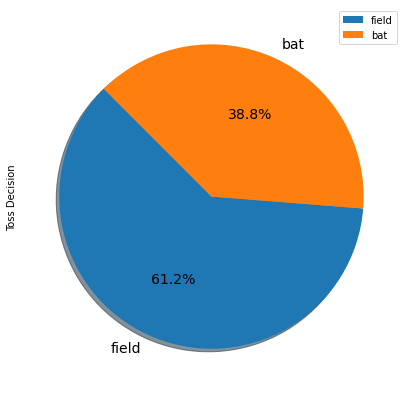

In [27]:
match['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%',figsize=(10,7), shadow=True, startangle=135, legend=True,)
plt.ylabel('Toss Decision')

### Observation:  
* Around 61.2% of the teams have decided to field 1st in the matches over the years

## Toss Winners in IPL

<AxesSubplot:title={'center':'Teams that won the maximum no. of tosses'}>

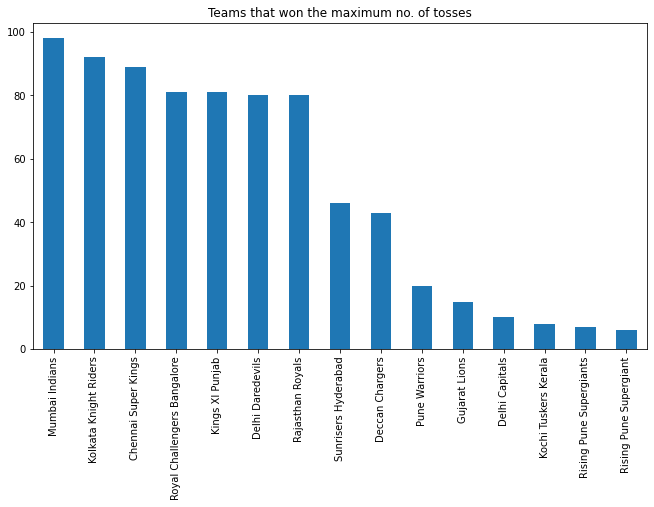

In [28]:
match['toss_winner'].value_counts().plot(kind='bar',figsize=(11,6), title='Teams that won the maximum no. of tosses')

### Observation:
* Mumbai Indians won the maximum number of tosses in IPL followed by Kolkata Knight Riders

## Affect of Toss Decisions on the Match Result 

Text(0, 0.5, 'Frequency')

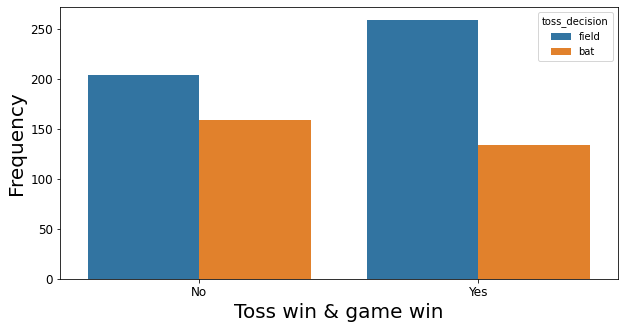

In [29]:
match['toss_win_game_win'] = np.where((match.toss_winner == match.winner),'Yes','No')
plt.figure(figsize = (10,5))
sns.countplot('toss_win_game_win', data=match, hue = 'toss_decision')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("Toss win & game win", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)

### Observation :
* Teams who choose to field first after winning the toss are more likely to win the match

# Total Runs During the Seasons

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

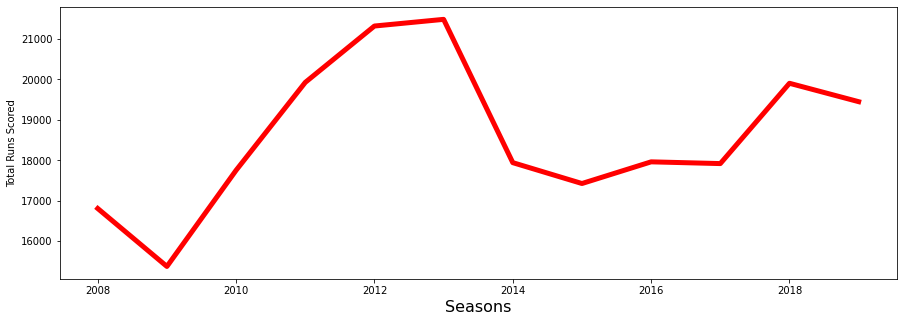

In [30]:
merge.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 5, figsize =(15,5),color = 'red')
plt.xlabel("Seasons", size = 16)
plt.ylabel("Total Runs Scored", size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

### Observation:
* Total runs scored by IPL Teams increased from 2008 and the highest number of runs reached its peak in year 2012

## Top Players with Highest Runs

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

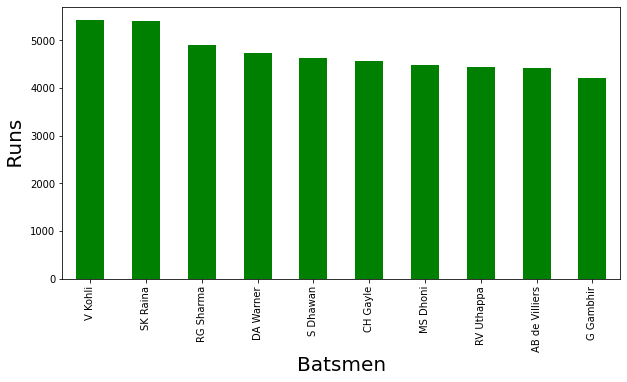

In [31]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green',figsize = (10,5))
plt.xlabel("Batsmen", size = 20)
plt.ylabel(" Runs ", size = 20)
plt.xticks(size = 10)
plt.yticks(size = 10)

### Observation:
* Virat Kohli , Suresh Raina and RG Sharma are among the top batsmen securing most of the runs

## Players with Highest Strike Rate During Seasons

In [32]:
#Let us consider all the players  who have played 11 or more seasons

noofballs = pd.DataFrame(merge.groupby('batsman')['ball'].count()) #number of matches played by each batsman

runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum()) #runs of each batsman

seasons_played = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) 

batsmanstrike_rate = pd.DataFrame({'balls':noofballs['ball'],'run':runs['batsman_runs'],'season':seasons_played['season']})
batsmanstrike_rate.reset_index(inplace = True)

batsmanstrike_rate['strike_rate'] = batsmanstrike_rate['run']/batsmanstrike_rate['balls']*100
higheststrike_rate = batsmanstrike_rate[batsmanstrike_rate.season.isin([11,12])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

higheststrike_rate.head(5)

,season,batsman,strike_rate
26,12,AB de Villiers,148.740343
92,11,CH Gayle,145.640370
509,12,YK Pathan,138.860326
444,11,SR Watson,136.945813
290,12,MS Dhoni,134.930681


### Observations:
* Ab de Villiers and CH Gayle scored the highest strike rates in IPL

## Top Players with Highest Wickets

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

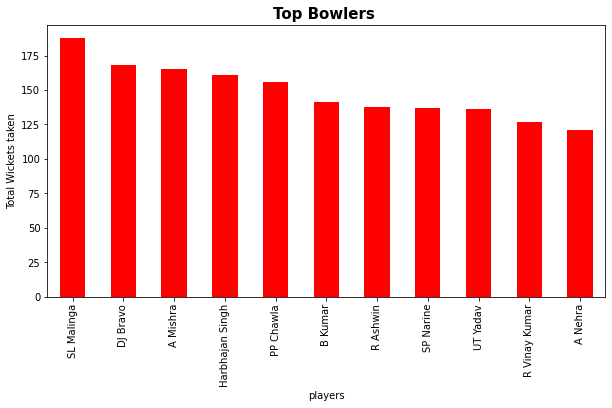

In [33]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(11).plot(kind = 'bar', color = 'red', figsize = (10,5))
plt.title("Top Bowlers ", fontsize = 15, fontweight = 'bold')
plt.xlabel("players", size = 10)
plt.ylabel("Total Wickets taken", size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

### Observations:
* SL Malinga taken the highest number of wickets followed by DJ Bravo & A Mishra


## No. of Extra Balls by Bowlers

In [34]:
extras = delivery[delivery['extra_runs']!=0]['bowler'].value_counts()[:11]
print(extras)

SL Malinga    221
P Kumar       185
UT Yadav      180
DJ Bravo      176
B Kumar       162
SR Watson     155
I Sharma      151
RP Singh      145
DW Steyn      139
R Ashwin      133
Z Khan        132
Name: bowler, dtype: int64


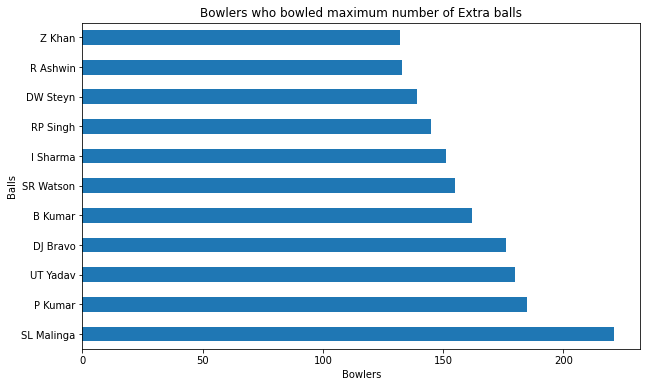

In [35]:
extras.plot(kind='barh', figsize=(10,6), title='Bowlers who bowled maximum number of Extra balls')
plt.xlabel('Bowlers')
plt.ylabel('Balls')
plt.show()

### Observation:
* Bowlers who bowled the maximum no. of extra balls include SL Malinga, followed by P Kumar & UT Yadav

##  Venues that Hosted Highest No. of IPL Matches

Text(0.5, 0, 'Venues')

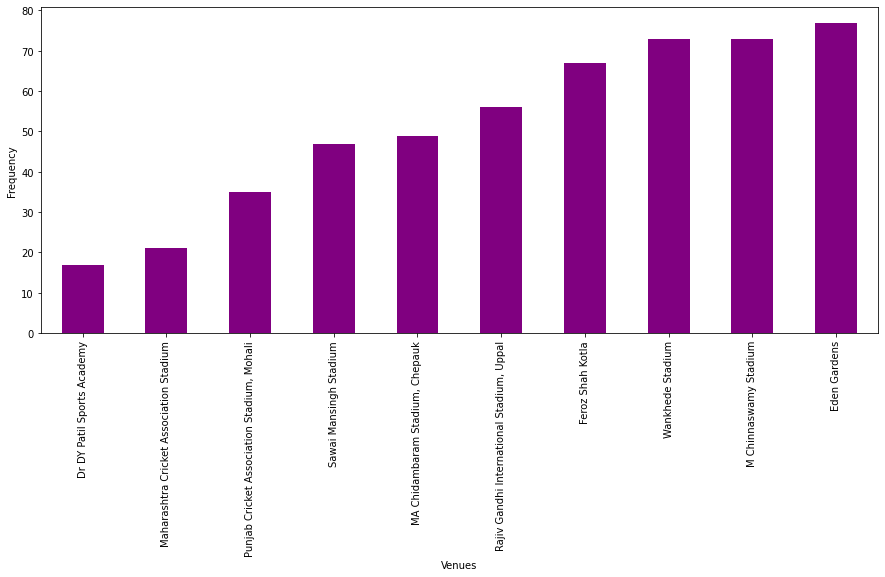

In [36]:
match.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'bar',figsize=(15,6), fontsize=10, color='purple')
plt.ylabel("Frequency", size = 10)
plt.xlabel("Venues", size = 10)

### Observation:
* Highest number of matches played at Eden Gardens followed by M Chinnaswamy Stadium and Wankhede Stadium

# Conclusions

## Most Successful Teams and Players
* **The Most successful teams are** MI, Chennai and KKR
* **The Most Successful Players are**:  Virat Kohli, Chris Gayle, AB de Villiers, Suresh Raina and Rohit Sharma

## Factors contributing win or loss of a team
* **Toss Factor** : Winning a toss is contributing more in team winning
* **Toss Decision**: Choosing the Field option after wining a toss is mostly led the team to win
* **Player's Performance**: Chris Gayle, AB de Villiers, RG sharma, D warner are the top players with Highest No. of Man of the Match awards taken

## Teams or Players a company should endorse for its products

Company should invest in **MI, CSK and KKR** and on **Virat Kohli, Chris Gayle, AB de Villiers, Suresh Raina, Rohit Sharma** Because these are the Top Performing Teams and Players

* If the company is looking for a batsman with exceptional runs, they should  go for Chris Gayle, AB deVillers, Virat Kohli ,R Sharma
 
* If the company  needs the best finisher having good strike rate then should go for Chris  Gayle,KA Pollard, DA Warner, SR Watson
 
* If the company needs a experienced bowler then  they should go for R Ashwin, SL Malinga, DJ Bravo , Harbhajan Singh ,A Mishra